### 영화

## 컬럼
- 순번
- 영화명
- 감독
- 제작사 
- 수입사 
- 배급사
- 개봉일
- 영화유형
- 영화형태
- 국적
- 스크린수
- 매출액
- 관객수
- 서울_매출액
- 서울_관객수
- 장르
- 등급
- 영화구분


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus']= False
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

- 사람들은 제작사나 수입사, 배급사를 보고 영화를 보지않기 때문에 데이터의 영향이 없을 것 이므로 칼럼 제외
- 매출액과 관객수는 같은 의미이므로 매출액 제외

In [3]:
df = pd.read_excel('../data/영화개봉.xlsx')
df.columns = ['순번', '영화명', '감독', '제작사', '수입사', '배급사', '개봉일', '영화유형', '영화형태', '국적','스크린수', '매출액', '관객수', '서울_매출액', '서울_관객수', '장르', '등급', '영화구분']
df = df[['영화명', '감독', '개봉일', '영화유형', '영화형태', '국적', '스크린수', '관객수', '서울_관객수', '장르', '등급', '영화구분']]
df = df.drop(index=0)
print(df.shape)
print(df.info())
df.head(3)

(16785, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16785 entries, 1 to 16785
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   영화명     16785 non-null  object        
 1   감독      16100 non-null  object        
 2   개봉일     16775 non-null  datetime64[ns]
 3   영화유형    16785 non-null  object        
 4   영화형태    16784 non-null  object        
 5   국적      16784 non-null  object        
 6   스크린수    16785 non-null  object        
 7   관객수     16785 non-null  object        
 8   서울_관객수  16785 non-null  object        
 9   장르      16705 non-null  object        
 10  등급      16769 non-null  object        
 11  영화구분    16785 non-null  object        
dtypes: datetime64[ns](1), object(11)
memory usage: 1.5+ MB
None


,영화명,감독,개봉일,영화유형,영화형태,국적,스크린수,관객수,서울_관객수,장르,등급,영화구분
1,명량,김한민,2014-07-30,개봉영화,장편,한국,1587,17613682,4163666,사극,15세이상관람가,일반영화
2,극한직업,이병헌,2019-01-23,개봉영화,장편,한국,1978,16264944,3638287,코미디,15세이상관람가,일반영화
3,신과함께-죄와 벌,김용화,2017-12-20,개봉영화,장편,한국,1912,14410754,3346172,판타지,12세이상관람가,일반영화


In [4]:
df = df.astype({'스크린수':'int','관객수':'int','서울_관객수':'int'})
#pd.to_numeric(df[['스크린수','관객수','매출액','서울_관객수','서울_매출액']])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16785 entries, 1 to 16785
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   영화명     16785 non-null  object        
 1   감독      16100 non-null  object        
 2   개봉일     16775 non-null  datetime64[ns]
 3   영화유형    16785 non-null  object        
 4   영화형태    16784 non-null  object        
 5   국적      16784 non-null  object        
 6   스크린수    16785 non-null  int32         
 7   관객수     16785 non-null  int32         
 8   서울_관객수  16785 non-null  int32         
 9   장르      16705 non-null  object        
 10  등급      16769 non-null  object        
 11  영화구분    16785 non-null  object        
dtypes: datetime64[ns](1), int32(3), object(8)
memory usage: 1.3+ MB


In [6]:
df.isnull().sum()

영화명         0
감독        685
개봉일        10
영화유형        0
영화형태        1
국적          1
스크린수        0
관객수         0
서울_관객수      0
장르         80
등급         16
영화구분        0
dtype: int64

- 감독 null값들을 확인을 해보니 영향을 끼치는 작품들이 있으므로, 변수 이름 지정, 매출액과 매출액 관객수 null값들은 다른 값으로 대체할시 데이터에 영향을 줄수 있기에 적은데이터니 제외

In [7]:
df['감독'] = df['감독'].fillna('미정')
df.dropna(inplace=True)
df.head(3)

,영화명,감독,개봉일,영화유형,영화형태,국적,스크린수,관객수,서울_관객수,장르,등급,영화구분
1,명량,김한민,2014-07-30,개봉영화,장편,한국,1587,17613682,4163666,사극,15세이상관람가,일반영화
2,극한직업,이병헌,2019-01-23,개봉영화,장편,한국,1978,16264944,3638287,코미디,15세이상관람가,일반영화
3,신과함께-죄와 벌,김용화,2017-12-20,개봉영화,장편,한국,1912,14410754,3346172,판타지,12세이상관람가,일반영화


- 등급과 장르 확인 후 정리

In [8]:
df['등급'].unique()

array(['15세이상관람가', '12세이상관람가', '전체관람가', '12세관람가', '15세관람가', '청소년관람불가',
       '18세관람가', '12세이상관람가,12세관람가', '15세관람가,15세이상관람가', '청소년관람불가,15세이상관람가',
       '18세관람가,15세이상관람가', '18세관람가,청소년관람불가', '12세이상관람가,전체관람가',
       '12세이상관람가,15세이상관람가', '15세이상관람가,전체관람가', '제한상영가', '15세관람가,12세이상관람가',
       '중학생이상관람가', '18세 미만인 자는 관람할 수 없는 등급', '모든 관람객이 관람할 수 있는 등급',
       '15세 미만인 자는 관람할 수 없는 등급', '연소자관람가,전체관람가', '12세 미만인 자는 관람할 수 없는 등급'],
      dtype=object)

In [9]:
df['등급'] = df['등급'].apply(lambda x:x.split(',')[0])
df['등급'] = df['등급'].apply(lambda x:x.split('관')[0])
df['등급'] = df['등급'].replace({'12세':'12세이상', '15세':'15세이상', '청소년':'15세이상', '18세':'18세이상', 
       '중학생이상':'15세이상', '18세 미만인 자는 ':'18세이상', '모든 ':'전체', '15세 미만인 자는 ':'15세이상', '연소자':'15세이상', '12세 미만인 자는 ':'12세이상'})
df.drop(7384, axis=0, inplace=True)
df['등급'].unique()

array(['15세이상', '12세이상', '전체', '18세이상'], dtype=object)

In [10]:
df['장르'] = df['장르'].apply(lambda x:x.split('/')[0])
df['장르'] = df['장르'].apply(lambda x:x.split('(')[0])
df['장르'].unique()

array(['사극', '코미디', '판타지', '드라마', '액션', '애니메이션', 'SF', '어드벤처', '전쟁', '범죄',
       '미스터리', '서부극', '멜로', '스릴러', '다큐멘터리', '공포', '가족', '뮤지컬', '공연', '기타',
       '성인물'], dtype=object)

In [11]:
df['영화구분'].unique()

array(['일반영화', '독립/예술영화'], dtype=object)

- 관객수, 스크린수 값이 0으로 되어있는 데이터들 정리(스크린수와 관객수가 0인 데이터들이 934개로 중간값이랑 평균값을 넣는것보다 제외시키기로함) 스크린수 10개이하, 관객수, 서울_관객수 10명이하

In [12]:
df.corr()

C:\Users\jkh75\AppData\Local\Temp\ipykernel_17868\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,스크린수,관객수,서울_관객수
스크린수,1.000000,0.643566,0.583727
관객수,0.643566,1.000000,0.950589
서울_관객수,0.583727,0.950589,1.000000


- 

In [16]:
df1 = df[(df['스크린수'] <= 10) & (df['관객수'] <= 10)].index
df2 = df[df['서울_관객수'] <= 10].index
df.drop(df1, inplace=True)
df.drop(df2, inplace=True)

In [17]:
df.head()

,영화명,감독,개봉일,영화유형,영화형태,국적,스크린수,관객수,서울_관객수,장르,등급,영화구분
1,명량,김한민,2014-07-30,개봉영화,장편,한국,1587,17613682,4163666,사극,15세이상,일반영화
2,극한직업,이병헌,2019-01-23,개봉영화,장편,한국,1978,16264944,3638287,코미디,15세이상,일반영화
3,신과함께-죄와 벌,김용화,2017-12-20,개봉영화,장편,한국,1912,14410754,3346172,판타지,12세이상,일반영화
4,국제시장,윤제균,2014-12-17,개봉영화,장편,한국,966,14245998,3233946,드라마,12세이상,일반영화
5,어벤져스: 엔드게임,"안소니 루소,조 루소",2019-04-24,개봉영화,장편,미국,2835,13934592,3597963,액션,12세이상,일반영화


- 개봉일을 년도, 월로 다른 컬럼으로 변경

In [18]:
df['개봉연도'] = df['개봉일'].dt.year
df['개봉월'] = df['개봉일'].dt.month

- 영화명 감독 컬럼으로 중복값 확인 (감독이름이 null값에서 미정으로 변경으로 인한 중복값으로 처리x)

In [19]:
df[df[['영화명','감독']].duplicated()]

,영화명,감독,개봉일,영화유형,영화형태,국적,스크린수,관객수,서울_관객수,장르,등급,영화구분,개봉연도,개봉월
6304,라 트라비아타,미정,2017-08-05,개봉영화,장편,미국,11,1768,1176,공연,12세이상,일반영화,2017,8
6578,라 트라비아타,미정,2017-01-22,개봉영화,장편,독일,9,1442,1078,공연,12세이상,일반영화,2017,1
7156,탄호이저,미정,2017-05-28,개봉영화,장편,독일,11,808,485,공연,15세이상,일반영화,2017,5
7244,토스카,루크 본디,2013-04-13,개봉영화,장편,독일,2,723,668,공연,전체,독립/예술영화,2013,4
7436,마담 버터플라이,미정,2020-05-05,개봉영화,장편,미국,6,564,396,공연,전체,일반영화,2020,5
7846,마농,로랑 펠리,2020-03-31,개봉영화,장편,미국,5,336,284,공연,12세이상,일반영화,2020,3
7869,사랑의 묘약,미정,2020-06-02,개봉영화,장편,이탈리아,5,319,229,공연,12세이상,일반영화,2020,6
8171,마농 레스코,미정,2020-08-03,개봉영화,장편,이탈리아,5,228,135,공연,12세이상,일반영화,2020,8
9998,라 보엠,미정,2020-11-29,개봉영화,장편,독일,7,41,23,공연,전체,일반영화,2020,11
10064,카르멘,미정,2020-06-03,개봉영화,장편,영국,6,37,20,공연,12세이상,일반영화,2020,6


- 관객수 평균값이 30만 이므로 30만 이상이면 흥행 이하면 비흥행으로 컬럼 생성

In [20]:
df['관객수'].mean()
movie_up = df['관객수'] >= 300000
movie_down = df['관객수'] < 300000
df.loc[movie_up == True, '흥행'] = '흥행'
df.loc[movie_down == True, '흥행'] = '비흥행'

- 데이터프레임 이름 변경, 다시 정렬, 저장

In [21]:
movie = df[['영화명','감독','개봉연도','개봉월','스크린수','관객수','서울_관객수','등급','장르','국적','영화구분','흥행']]
movie.to_csv('../data/영화')

### 영화
- 영화명
- 감독
- 개봉연도
- 개봉월
- 스크린수
- 관객수
- 서울_관객수
- 등급
- 장르
- 국적
- 영화구분
- 흥행

In [22]:
movie.head(3)

,영화명,감독,개봉연도,개봉월,스크린수,관객수,서울_관객수,등급,장르,국적,영화구분,흥행
1,명량,김한민,2014,7,1587,17613682,4163666,15세이상,사극,한국,일반영화,흥행
2,극한직업,이병헌,2019,1,1978,16264944,3638287,15세이상,코미디,한국,일반영화,흥행
3,신과함께-죄와 벌,김용화,2017,12,1912,14410754,3346172,12세이상,판타지,한국,일반영화,흥행


- 각 컬럼간의 상관 관계

C:\Users\jkh75\AppData\Local\Temp\ipykernel_17868\1030335907.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(movie.corr(),annot=True)


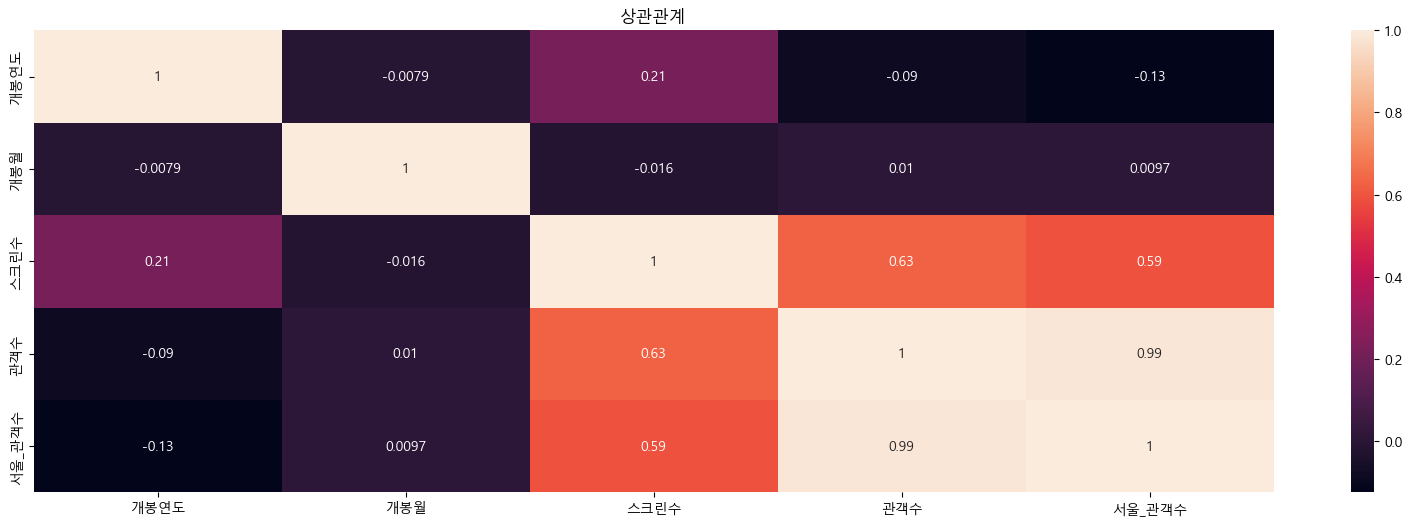

In [23]:
plt.figure(figsize=(20,6))
plt.title('상관관계')
sns.heatmap(movie.corr(),annot=True)
pass

In [24]:
movie.head()

,영화명,감독,개봉연도,개봉월,스크린수,관객수,서울_관객수,등급,장르,국적,영화구분,흥행
1,명량,김한민,2014,7,1587,17613682,4163666,15세이상,사극,한국,일반영화,흥행
2,극한직업,이병헌,2019,1,1978,16264944,3638287,15세이상,코미디,한국,일반영화,흥행
3,신과함께-죄와 벌,김용화,2017,12,1912,14410754,3346172,12세이상,판타지,한국,일반영화,흥행
4,국제시장,윤제균,2014,12,966,14245998,3233946,12세이상,드라마,한국,일반영화,흥행
5,어벤져스: 엔드게임,"안소니 루소,조 루소",2019,4,2835,13934592,3597963,12세이상,액션,미국,일반영화,흥행


In [25]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9789 entries, 1 to 10585
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   영화명     9789 non-null   object
 1   감독      9789 non-null   object
 2   개봉연도    9789 non-null   int64 
 3   개봉월     9789 non-null   int64 
 4   스크린수    9789 non-null   int32 
 5   관객수     9789 non-null   int32 
 6   서울_관객수  9789 non-null   int32 
 7   등급      9789 non-null   object
 8   장르      9789 non-null   object
 9   국적      9789 non-null   object
 10  영화구분    9789 non-null   object
 11  흥행      9789 non-null   object
dtypes: int32(3), int64(2), object(7)
memory usage: 879.5+ KB


<AxesSubplot: xlabel='흥행', ylabel='count'>

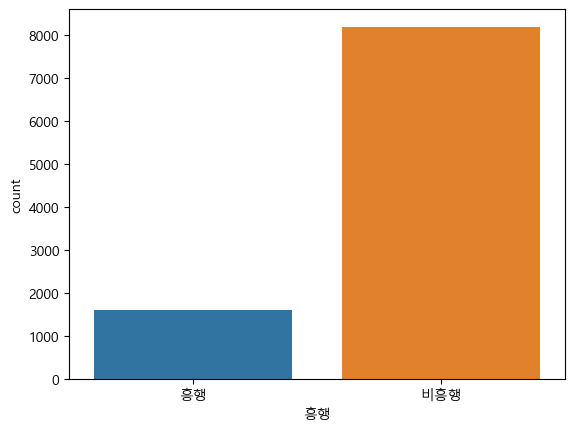

In [28]:
sns.countplot(movie, x='흥행')

<AxesSubplot: xlabel='개봉연도', ylabel='count'>

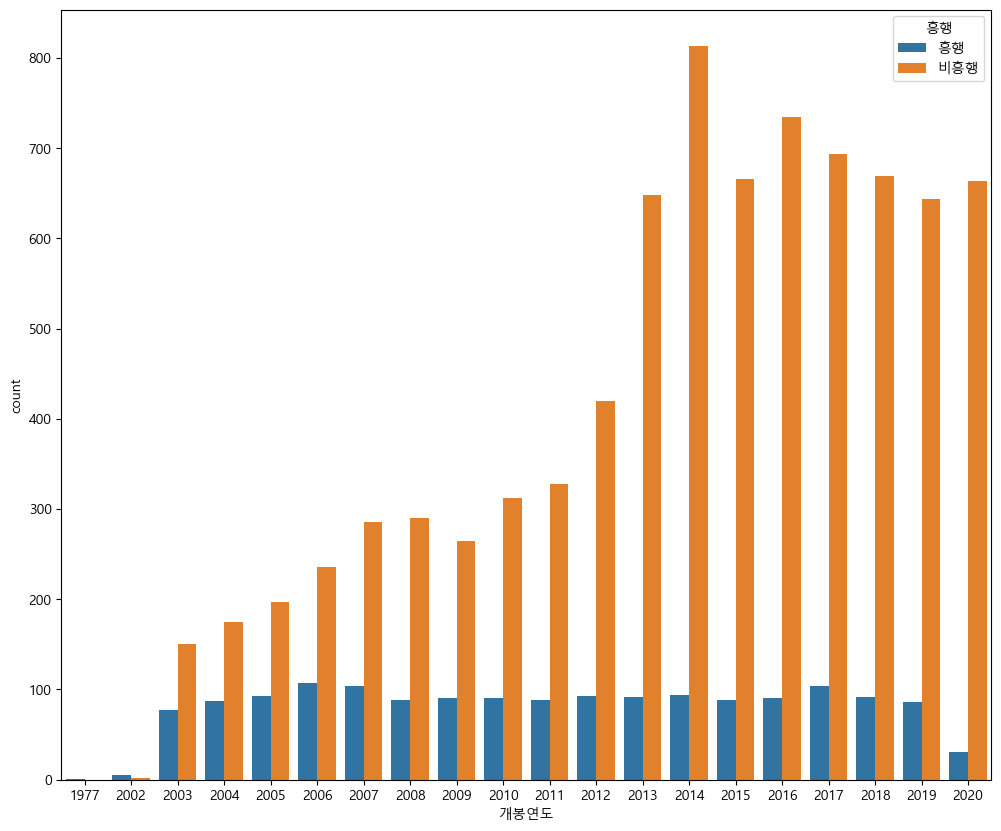

In [30]:
plt.figure(figsize=(12,10))
sns.countplot(x=movie['개봉연도'], hue=movie['흥행'])

- 감독 상위20 관객수, 흥행한 영화 상위10감독, 작품수

<AxesSubplot: >

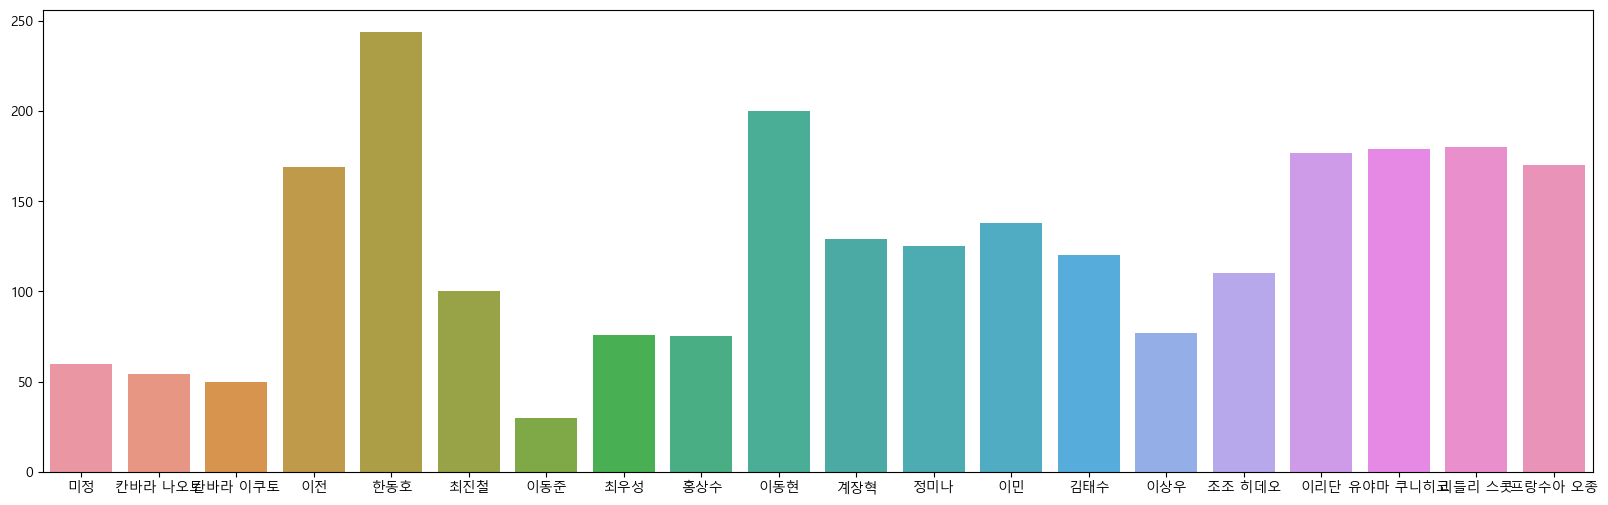

In [32]:
plt.figure(figsize=(20,6))
sns.barplot(x = movie['감독'].value_counts().index[:20],y = movie['관객수'].value_counts().index[:20])

In [34]:
director = movie[['감독','흥행']]
director_df = director[director['흥행'] == '흥행'].value_counts()[:10].to_frame()

In [35]:
director_df = director_df.reset_index()
director_df.rename(columns={0:'작품수'},inplace=True)
director_df

,감독,흥행,작품수
0,이준익,흥행,12
1,강우석,흥행,8
2,리들리 스콧,흥행,8
3,류승완,흥행,8
4,크리스토퍼 놀란,흥행,8
5,장진,흥행,8
6,유야마 쿠니히코,흥행,7
7,마이클 베이,흥행,7
8,잭 스나이더,흥행,7
9,곽경택,흥행,7


<AxesSubplot: xlabel='감독', ylabel='작품수'>

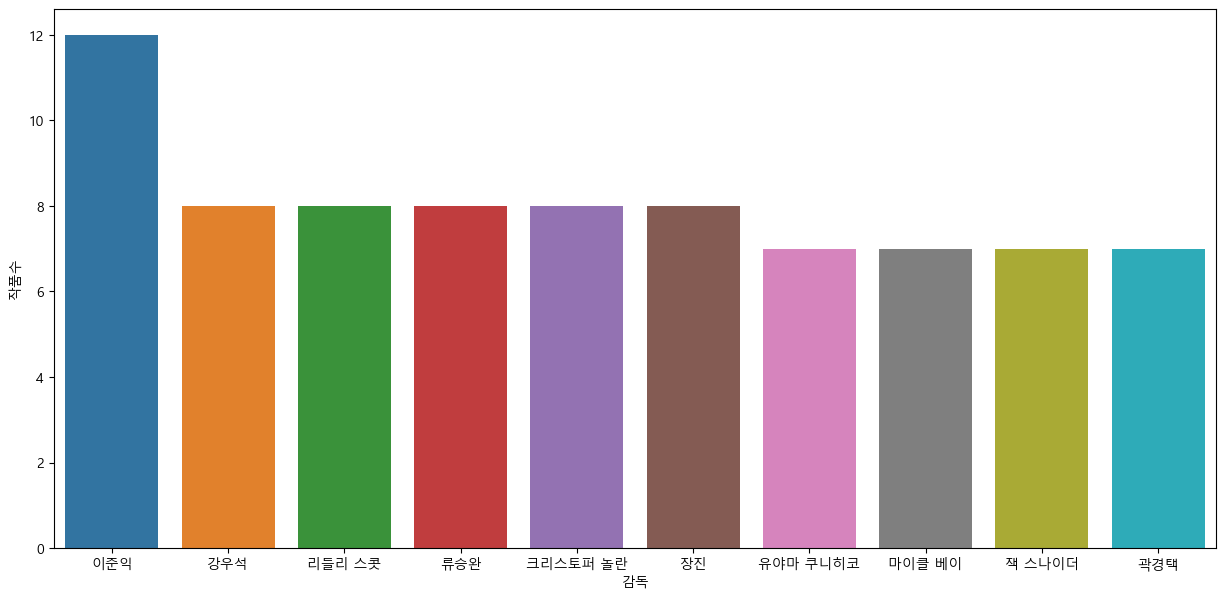

In [36]:
plt.figure(figsize = (15,7))
sns.barplot(x = director_df['감독'], y = director_df['작품수'])

<AxesSubplot: xlabel='장르', ylabel='count'>

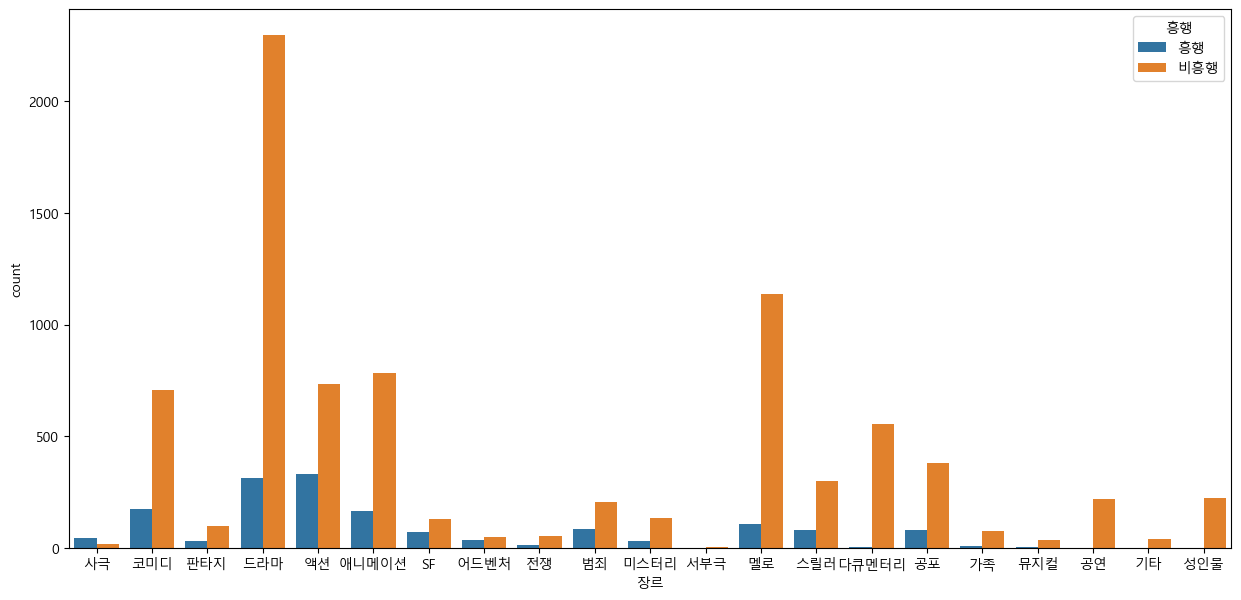

In [38]:
plt.figure(figsize=(15,7))
sns.countplot(x = movie['장르'], hue = movie['흥행'])

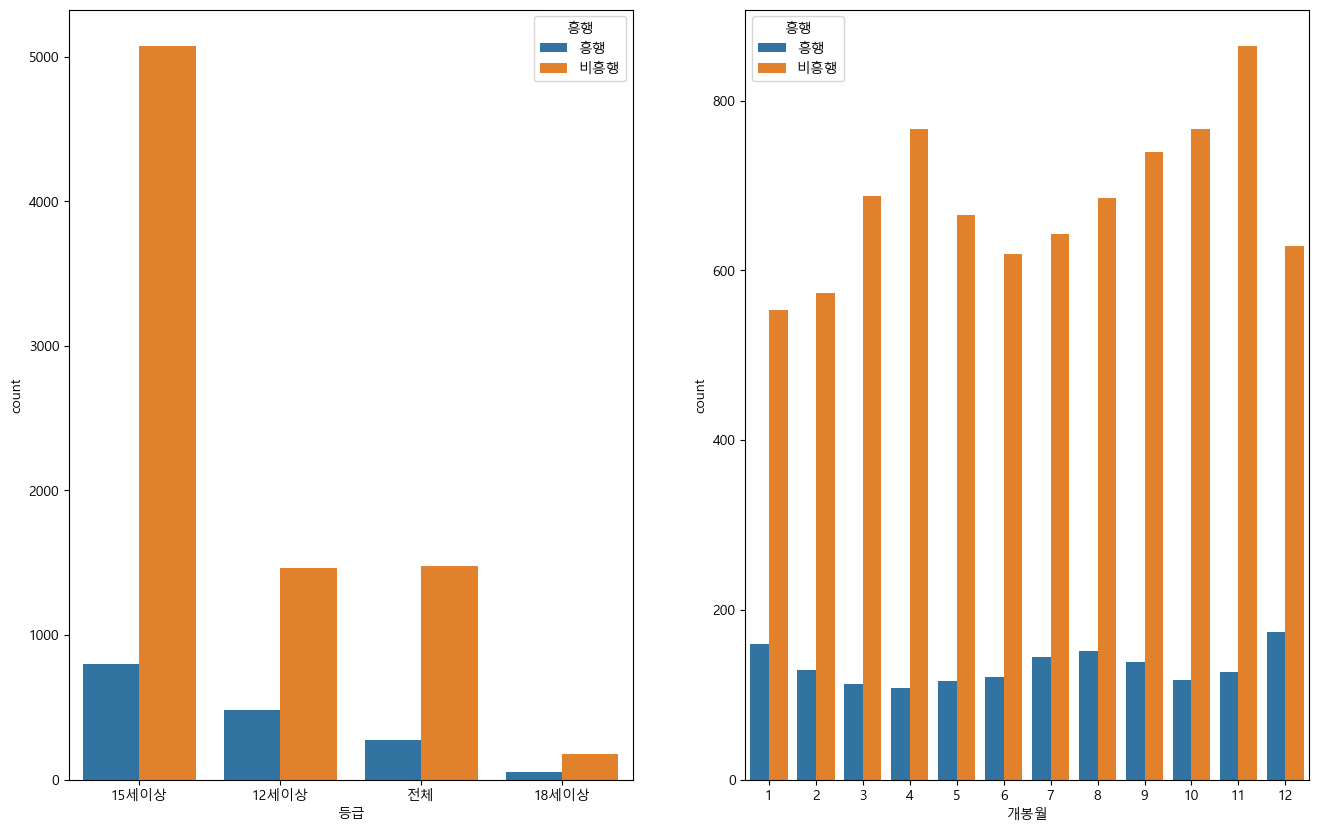

In [41]:
fig,ax = plt.subplots(ncols=2,figsize=(16,10)) 
sns.countplot(x = movie['등급'], hue = movie['흥행'],ax=ax[0])
sns.countplot(x = movie['개봉월'], hue = movie['흥행'],ax=ax[1])
pass